In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization
from keras import regularizers
from keras.models import Sequential, Model
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.shape

(569, 31)

In [6]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)
#y = dataset.iloc[:,0].values

In [8]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
x.shape

(569, 30)

In [10]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [11]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [12]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)

In [14]:
#initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

input_data = Input(shape=(30,))
encoded = Dense(3, activation='relu', activity_regularizer = regularizers.l1(1e-6))(input_data)
#encoded = BatchNormalization()(encoded)
decoded = Dense(30, activation='sigmoid')(encoded)

In [15]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.001)
autoencoder.compile(loss="mse",optimizer=opt)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                120       
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [16]:
x_test

array([[0.60581042, 0.65805658, 0.61222417, ..., 0.71293748, 1.        ,
        0.53274776],
       [0.41150909, 0.84870849, 0.40596436, ..., 0.52261109, 0.4717482 ,
        0.39278213],
       [0.15047489, 0.66482165, 0.1459699 , ..., 0.1482501 , 0.24497535,
        0.46992553],
       ...,
       [0.32273884, 0.59225092, 0.30865109, ..., 0.29221392, 0.1774744 ,
        0.19763223],
       [0.5462164 , 0.43050431, 0.55221125, ..., 0.71175777, 0.59385666,
        0.88543059],
       [0.68713142, 0.32349323, 0.70547503, ..., 0.82658278, 0.57830868,
        1.        ]])

In [17]:
history = autoencoder.fit(x_train, x_train, epochs=500, shuffle=True, validation_data=(x_val, x_val))

Train on 460 samples, validate on 57 samples
Epoch 1/500
460/460 [==============================] - 0s 176us/step - loss: 0.0979 - val_loss: 0.0845
Epoch 2/500
460/460 [==============================] - 0s 35us/step - loss: 0.0947 - val_loss: 0.0829
Epoch 3/500
460/460 [==============================] - 0s 35us/step - loss: 0.0913 - val_loss: 0.0815
Epoch 4/500
460/460 [==============================] - 0s 33us/step - loss: 0.0877 - val_loss: 0.0802
Epoch 5/500
460/460 [==============================] - 0s 33us/step - loss: 0.0839 - val_loss: 0.0792
Epoch 6/500
460/460 [==============================] - 0s 33us/step - loss: 0.0798 - val_loss: 0.0783
Epoch 7/500
460/460 [==============================] - 0s 33us/step - loss: 0.0754 - val_loss: 0.0772
Epoch 8/500
460/460 [==============================] - 0s 39us/step - loss: 0.0697 - val_loss: 0.0764
Epoch 9/500
460/460 [==============================] - 0s 35us/step - loss: 0.0633 - val_loss: 0.0771
Epoch 10/500
460/460 [==============

460/460 [==============================] - 0s 37us/step - loss: 0.0108 - val_loss: 0.0362
Epoch 159/500
460/460 [==============================] - 0s 35us/step - loss: 0.0108 - val_loss: 0.0360
Epoch 160/500
460/460 [==============================] - 0s 35us/step - loss: 0.0108 - val_loss: 0.0358
Epoch 161/500
460/460 [==============================] - 0s 37us/step - loss: 0.0107 - val_loss: 0.0359
Epoch 162/500
460/460 [==============================] - 0s 37us/step - loss: 0.0107 - val_loss: 0.0356
Epoch 163/500
460/460 [==============================] - 0s 35us/step - loss: 0.0107 - val_loss: 0.0355
Epoch 164/500
460/460 [==============================] - 0s 37us/step - loss: 0.0107 - val_loss: 0.0357
Epoch 165/500
460/460 [==============================] - 0s 35us/step - loss: 0.0106 - val_loss: 0.0353
Epoch 166/500
460/460 [==============================] - 0s 33us/step - loss: 0.0106 - val_loss: 0.0353
Epoch 167/500
460/460 [==============================] - 0s 33us/step - loss: 

Epoch 237/500
460/460 [==============================] - 0s 35us/step - loss: 0.0091 - val_loss: 0.0313
Epoch 238/500
460/460 [==============================] - 0s 39us/step - loss: 0.0091 - val_loss: 0.0311
Epoch 239/500
460/460 [==============================] - 0s 33us/step - loss: 0.0090 - val_loss: 0.0311
Epoch 240/500
460/460 [==============================] - 0s 35us/step - loss: 0.0090 - val_loss: 0.0310
Epoch 241/500
460/460 [==============================] - 0s 33us/step - loss: 0.0090 - val_loss: 0.0309
Epoch 242/500
460/460 [==============================] - 0s 33us/step - loss: 0.0090 - val_loss: 0.0309
Epoch 243/500
460/460 [==============================] - 0s 43us/step - loss: 0.0089 - val_loss: 0.0309
Epoch 244/500
460/460 [==============================] - 0s 33us/step - loss: 0.0089 - val_loss: 0.0309
Epoch 245/500
460/460 [==============================] - 0s 35us/step - loss: 0.0089 - val_loss: 0.0309
Epoch 246/500
460/460 [==============================] - 0s 35us

Epoch 394/500
460/460 [==============================] - 0s 35us/step - loss: 0.0071 - val_loss: 0.0252
Epoch 395/500
460/460 [==============================] - 0s 35us/step - loss: 0.0071 - val_loss: 0.0251
Epoch 396/500
460/460 [==============================] - 0s 33us/step - loss: 0.0071 - val_loss: 0.0251
Epoch 397/500
460/460 [==============================] - 0s 39us/step - loss: 0.0071 - val_loss: 0.0250
Epoch 398/500
460/460 [==============================] - 0s 33us/step - loss: 0.0071 - val_loss: 0.0250
Epoch 399/500
460/460 [==============================] - 0s 35us/step - loss: 0.0071 - val_loss: 0.0251
Epoch 400/500
460/460 [==============================] - 0s 35us/step - loss: 0.0071 - val_loss: 0.0250
Epoch 401/500
460/460 [==============================] - 0s 33us/step - loss: 0.0071 - val_loss: 0.0250
Epoch 402/500
460/460 [==============================] - 0s 35us/step - loss: 0.0071 - val_loss: 0.0249
Epoch 403/500
460/460 [==============================] - 0s 33us

Epoch 473/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0236
Epoch 474/500
460/460 [==============================] - 0s 33us/step - loss: 0.0068 - val_loss: 0.0236
Epoch 475/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0236
Epoch 476/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0236
Epoch 477/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0236
Epoch 478/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0235
Epoch 479/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0236
Epoch 480/500
460/460 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.0235
Epoch 481/500
460/460 [==============================] - 0s 43us/step - loss: 0.0068 - val_loss: 0.0237
Epoch 482/500
460/460 [==============================] - 0s 35us

In [18]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

52/52 [==============================] - 0s 96us/step
Loss: 0.028783240140630648


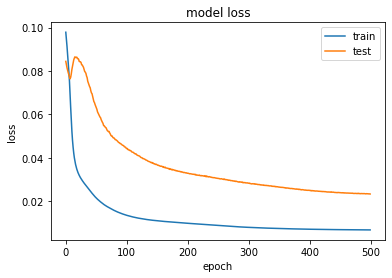

In [19]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('spsrseAE_model_loss.png')
plt.show()

In [20]:
autoencoder.evaluate(x_test, x_test)
#model.save('si_autoencoder.model')
data = autoencoder.predict(x_test)

52/52 [==============================] - 0s 58us/step


In [21]:
data

array([[0.60058856, 0.43008718, 0.62104505, ..., 0.87937593, 0.4438152 ,
        0.41045016],
       [0.4666293 , 0.3768761 , 0.4656165 , ..., 0.6116306 , 0.2938995 ,
        0.2023402 ],
       [0.10611238, 0.24521326, 0.11005142, ..., 0.27235368, 0.30395246,
        0.32058415],
       ...,
       [0.32306767, 0.32504466, 0.3086866 , ..., 0.3032396 , 0.20492165,
        0.11307462],
       [0.45384488, 0.3871687 , 0.48186448, ..., 0.8464347 , 0.4685298 ,
        0.49342838],
       [0.31123695, 0.3448406 , 0.34196666, ..., 0.80528754, 0.49407715,
        0.578998  ]], dtype=float32)

In [22]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [23]:
latent_vector.shape

(52, 3)

In [24]:
latent_vector

array([[0.        , 0.        , 1.5263143 ],
       [1.0257218 , 0.        , 1.9164964 ],
       [1.4234188 , 0.        , 0.        ],
       [0.76742077, 0.        , 1.2288957 ],
       [1.9093592 , 0.        , 2.140087  ],
       [1.1965104 , 0.        , 2.64974   ],
       [1.694637  , 0.        , 0.31559002],
       [1.2472649 , 0.        , 0.8365288 ],
       [1.4138279 , 0.        , 1.0646772 ],
       [1.5642341 , 0.        , 1.4047837 ],
       [1.3952342 , 0.        , 1.3984475 ],
       [1.5934877 , 0.        , 2.2514727 ],
       [1.8472466 , 0.        , 1.8298633 ],
       [1.3171574 , 0.        , 0.6877    ],
       [0.58093214, 0.        , 2.3328638 ],
       [1.0560818 , 0.        , 0.8741826 ],
       [2.0491145 , 0.        , 0.9924106 ],
       [0.        , 0.        , 1.9240456 ],
       [1.8045303 , 0.        , 1.2258513 ],
       [1.9009595 , 0.        , 2.684341  ],
       [0.        , 0.        , 1.6710445 ],
       [0.2809925 , 0.        , 0.        ],
       [0.

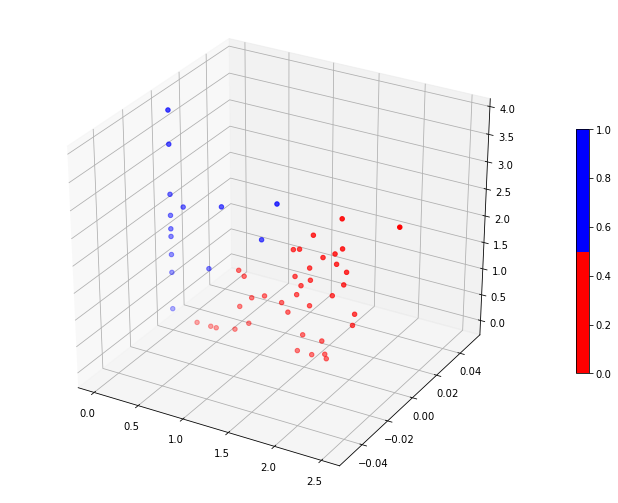

In [25]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('sparseAE_3d.png')
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8846153846153846 and k :  [3]


In [27]:
y_pred=knn.predict(latent_vector)

In [29]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.21153846153846154
Mean Squared Error: 0.21153846153846154
Root Mean Squared Error: 0.45993310550389993
[[27 11]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        38
           1       0.56      1.00      0.72        14

    accuracy                           0.79        52
   macro avg       0.78      0.86      0.77        52
weighted avg       0.88      0.79      0.80        52

